# UC San Diego: Data Science in Practice - EDA Checkpoint
### Summer Session I 2023 | Instructor : C. Alex Simpkins Ph.D.

## Draft project title if you have one (can be changed later)

(This checkpoint helps you to perform your EDA on your data for your project. You can remove this text description. Consider this the next step in your final project. See the project readme for bullet points to check off in terms of details to include beyond the main section heading content below.)

# Names

- Ant Man
- Hulk
- Iron Man
- Thor
- Wasp

<a id='research_question'></a>
# Research Question

* Are hate crimes motivated by racial prejudice significantly more prevalent than sexual oruentation in the distribution of hate crimes in San Diego in the past 7 years?

# Setup

# Data Cleaning

Describe your data cleaning steps here.

In [4]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
data_path = 'https://raw.githubusercontent.com/wanzouli/team18_selfcreated/main/hate_crimes_datasd.csv'
df = pd.read_csv(data_path)

# Selecting the columns of interest for the analysis
df = df.loc[:, ['year', 'motivation']]

# Filter rows with valid motivations (Race or Other)
df = df.dropna(subset=['motivation'])

# Create a contingency table for the chi-square test
contingency_table = pd.crosstab(df['year'], df['motivation'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Display the results of the chi-square test
print("\nChi-square value:", chi2)
print("P-value:", p_value)

Contingency Table:
motivation  Anti-Religion  Anti-Transgender  Gender  Race  Race/Disability  \
year                                                                         
2016                    0                 0       2    22                0   
2017                    0                 0       1    18                0   
2018                    0                 0       0    21                0   
2019                    0                 0       0     8                1   
2020                    0                 1       0    17                0   
2021                    1                 0       0    26                0   
2022                    0                 0       0    21                0   

motivation  Race/Religion  Race/Sex  Race/Sexual Orientation  Rel/Sex  \
year                                                                    
2016                    0         0                        0        0   
2017                    0         0                        

# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

Contingency Table:
victim_race_0       A   B  E  F   H  I  M  O  Unk   W
motivation                                           
Anti-Transgender    0   0  0  0   0  0  0  0    0   1
Gender              0   0  0  0   1  1  0  0    0   1
Race                9  58  0  2  28  0  2  7    1  14
Race/Disability     0   1  0  0   0  0  0  0    0   0
Race/Religion       0   0  0  0   0  0  1  0    0   0
Race/Sex            0   2  0  0   0  0  0  0    0   0
Religion            1   2  0  0   5  0  0  4    0  19
Sex                 0   0  0  1   3  0  0  0    0   4
Sexual Orientation  4   2  1  1  17  0  0  2    0  30
Sexuality           0   1  0  0   0  0  0  0    0   1

Chi-square value: 248.961724568795
P-value: 5.616063037036017e-19


In [5]:
# Data Analysis & Results (EDA)
# Carry out EDA on your dataset(s); Describe in this section

# Count the number of hate crimes for each motivation category
motivation_counts = df['motivation'].value_counts()

# Plot a bar chart to visualize the distribution of hate crimes based on motivation
plt.bar(motivation_counts.index, motivation_counts.values)
plt.xlabel('Crime Motivation')
plt.ylabel('Number of Hate Crimes')
plt.title('Distribution of Hate Crimes based on Motivation')
plt.show()

# Calculate the percentage of hate crimes for each motivation category
motivation_percentages = (motivation_counts / len(df)) * 100

# Display the percentage of hate crimes for each motivation category
print("Percentage of Hate Crimes based on Motivation:")
print(motivation_percentages)

# Calculate the total number of hate crimes
total_hate_crimes = len(df)

# Calculate the number of hate crimes motivated by racial prejudice (Race)
racial_hate_crimes = len(df[df['motivation'] == 'Race'])

# Calculate the number of hate crimes motivated by other factors (Sexual Orientation)
sexual_orientation_hate_crimes = len(df[df['motivation'] == 'Sexual Orientation'])

# Perform a Fisher's exact test to check if hate crimes motivated by racial prejudice are significantly more prevalent
# than hate crimes motivated by other factors
odds_ratio, p_value = fisher_exact([[racial_hate_crimes, sexual_orientation_hate_crimes],
                                    [total_hate_crimes - racial_hate_crimes, total_hate_crimes - sexual_orientation_hate_crimes]])

# Display the results of the Fisher's exact test
print("Fisher's exact test results:")
print("Odds Ratio:", odds_ratio)
print("p-value:", p_value)


NameError: name 'plt' is not defined

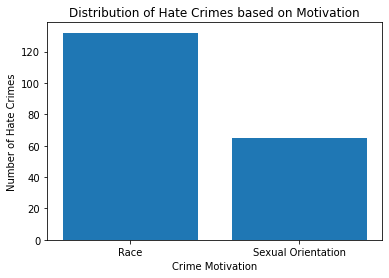

Percentage of Hate Crimes based on Motivation:
Race                  67.005076
Sexual Orientation    32.994924
Name: motivation, dtype: float64
Fisher's exact test results:
Odds Ratio: 4.124023668639054
p-value: 1.9007938821039908e-11


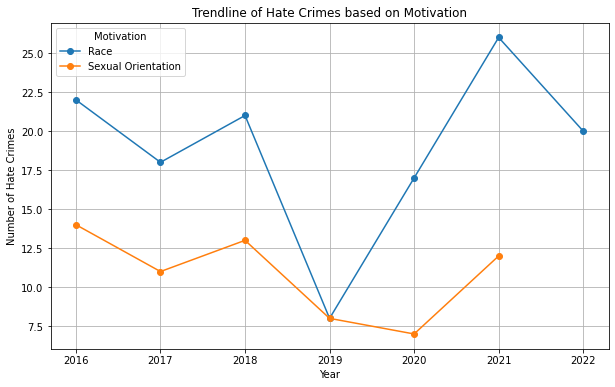

In [6]:
# Set up - Import necessary libraries and load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

# Load the dataset from the provided URL
data_path = 'https://raw.githubusercontent.com/wanzouli/team18_selfcreated/main/hate_crimes_datasd.csv'
df = pd.read_csv(data_path)

# Data Cleaning - Select relevant columns and filter rows based on motivations
df = df.loc[:, ['year', 'crime', 'motivation', 'weapon', 'injury']]
df = df[df['motivation'].isin(['Race', 'Sexual Orientation'])]
df = df.dropna()

# Data Analysis & Results (EDA) - Explore the dataset

# Count the number of hate crimes for each motivation category
motivation_counts = df['motivation'].value_counts()

# Plot a bar chart to visualize the distribution of hate crimes based on motivation
plt.bar(motivation_counts.index, motivation_counts.values)
plt.xlabel('Crime Motivation')
plt.ylabel('Number of Hate Crimes')
plt.title('Distribution of Hate Crimes based on Motivation')
plt.show()

# Calculate the percentage of hate crimes for each motivation category
motivation_percentages = (motivation_counts / len(df)) * 100

# Display the percentage of hate crimes for each motivation category
print("Percentage of Hate Crimes based on Motivation:")
print(motivation_percentages)

# Calculate the total number of hate crimes
total_hate_crimes = len(df)

# Calculate the number of hate crimes motivated by racial prejudice (Race)
racial_hate_crimes = len(df[df['motivation'] == 'Race'])

# Calculate the number of hate crimes motivated by other factors (Sexual Orientation)
sexual_orientation_hate_crimes = len(df[df['motivation'] == 'Sexual Orientation'])

# Perform a Fisher's exact test to check if hate crimes motivated by racial prejudice are significantly more prevalent
# than hate crimes motivated by other factors
odds_ratio, p_value = fisher_exact([[racial_hate_crimes, sexual_orientation_hate_crimes],
                                    [total_hate_crimes - racial_hate_crimes, total_hate_crimes - sexual_orientation_hate_crimes]])

# Display the results of the Fisher's exact test
print("Fisher's exact test results:")
print("Odds Ratio:", odds_ratio)
print("p-value:", p_value)

# Create a trendline for the number of hate crimes based on motivation ('Race' and 'Sexual Orientation') over the years
motivation_counts_by_year = df.groupby(['year', 'motivation'])['crime'].count().unstack()

# Plot the trendline for 'Race' and 'Sexual Orientation' motivations over the years
motivation_counts_by_year.plot(marker='o', linestyle='-', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Hate Crimes')
plt.title('Trendline of Hate Crimes based on Motivation')
plt.legend(title='Motivation', loc='best')
plt.grid(True)
plt.show()


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

# Assuming you have already loaded and cleaned the data into the DataFrame 'df'
# (See previous code)

# Group the data by 'year' and 'motivation' and count the number of hate crimes in each group
motivation_counts_by_year = df.groupby(['year', 'motivation'])['crime'].count().unstack()

# Create a table to display the trendline of hate crimes based on motivation over the years
trendline_table = pd.DataFrame(motivation_counts_by_year)

# Rename the columns for clarity
trendline_table.columns = ['Race', 'Sexual Orientation']

# Display the trendline table
print("Trendline of Hate Crimes based on Motivation:")
print(trendline_table)


Trendline of Hate Crimes based on Motivation:
      Race  Sexual Orientation
year                          
2016  22.0                14.0
2017  18.0                11.0
2018  21.0                13.0
2019   8.0                 8.0
2020  17.0                 7.0
2021  26.0                12.0
2022  20.0                 NaN


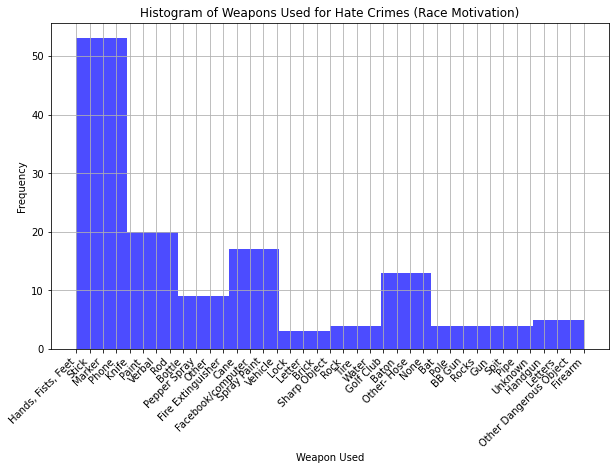

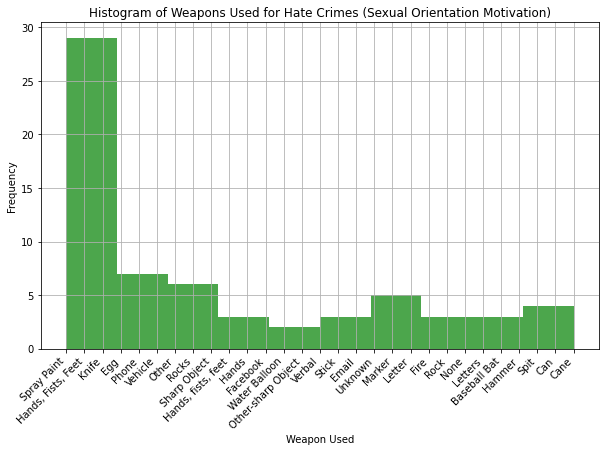

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

# Assuming you have already loaded and cleaned the data into the DataFrame 'df'
# (See previous code)

# Separate the data for each motivation ('Race' and 'Sexual Orientation')
df_race = df[df['motivation'] == 'Race']
df_sexual_orientation = df[df['motivation'] == 'Sexual Orientation']

# Create histograms for weapons used for 'Race' motivation
plt.figure(figsize=(10, 6))
plt.hist(df_race['weapon'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Weapon Used')
plt.ylabel('Frequency')
plt.title('Histogram of Weapons Used for Hate Crimes (Race Motivation)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Create histograms for weapons used for 'Sexual Orientation' motivation
plt.figure(figsize=(10, 6))
plt.hist(df_sexual_orientation['weapon'], bins=10, color='green', alpha=0.7)
plt.xlabel('Weapon Used')
plt.ylabel('Frequency')
plt.title('Histogram of Weapons Used for Hate Crimes (Sexual Orientation Motivation)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


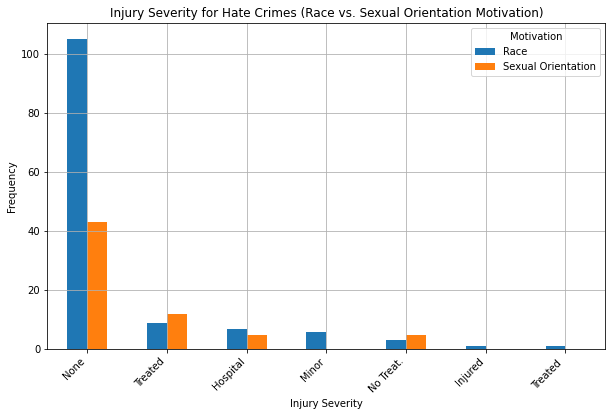

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

# Assuming you have already loaded and cleaned the data into the DataFrame 'df'
# (See previous code)

# Separate the data for each motivation ('Race' and 'Sexual Orientation')
df_race = df[df['motivation'] == 'Race']
df_sexual_orientation = df[df['motivation'] == 'Sexual Orientation']

# Get the frequency of injury severity for 'Race' motivation
injury_counts_race = df_race['injury'].value_counts()

# Get the frequency of injury severity for 'Sexual Orientation' motivation
injury_counts_sexual_orientation = df_sexual_orientation['injury'].value_counts()

# Combine the injury counts into a single DataFrame for plotting
injury_counts_combined = pd.concat([injury_counts_race, injury_counts_sexual_orientation], axis=1)
injury_counts_combined.columns = ['Race', 'Sexual Orientation']

# Plot the graph
injury_counts_combined.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Injury Severity')
plt.ylabel('Frequency')
plt.title('Injury Severity for Hate Crimes (Race vs. Sexual Orientation Motivation)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Motivation', loc='upper right')
plt.grid(True)
plt.show()


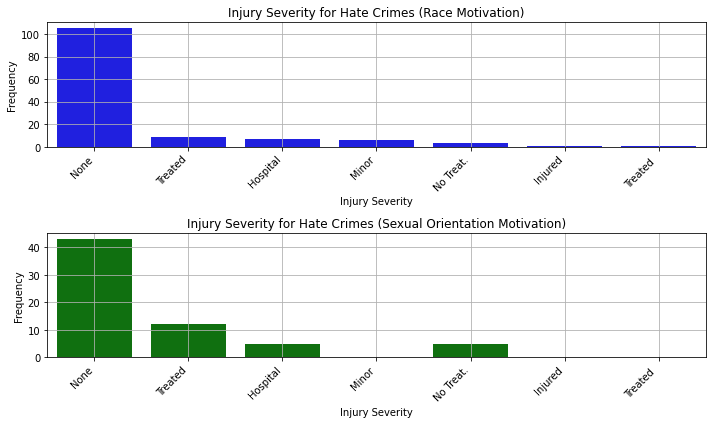

Chi-Square Test Results:
Chi-Square: nan
p-value: nan


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Assuming you have already loaded and cleaned the data into the DataFrame 'df'
# (See previous code)

# Separate the data for each motivation ('Race' and 'Sexual Orientation')
df_race = df[df['motivation'] == 'Race']
df_sexual_orientation = df[df['motivation'] == 'Sexual Orientation']

# Get the frequency of injury severity for 'Race' motivation
injury_counts_race = df_race['injury'].value_counts()

# Get the frequency of injury severity for 'Sexual Orientation' motivation
injury_counts_sexual_orientation = df_sexual_orientation['injury'].value_counts()

# Combine the injury counts into a single DataFrame for plotting
injury_counts_combined = pd.concat([injury_counts_race, injury_counts_sexual_orientation], axis=1)
injury_counts_combined.columns = ['Race', 'Sexual Orientation']

# Plot the graph - Create a bar plot
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
sns.barplot(x=injury_counts_combined.index, y=injury_counts_combined['Race'], color='blue')
plt.xlabel('Injury Severity')
plt.ylabel('Frequency')
plt.title('Injury Severity for Hate Crimes (Race Motivation)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.subplot(2, 1, 2)
sns.barplot(x=injury_counts_combined.index, y=injury_counts_combined['Sexual Orientation'], color='green')
plt.xlabel('Injury Severity')
plt.ylabel('Frequency')
plt.title('Injury Severity for Hate Crimes (Sexual Orientation Motivation)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.tight_layout()
plt.show()

# Perform statistical comparison using the chi-square test
chi2, p_value, _, _ = chi2_contingency(injury_counts_combined)
print("Chi-Square Test Results:")
print("Chi-Square:", chi2)
print("p-value:", p_value)


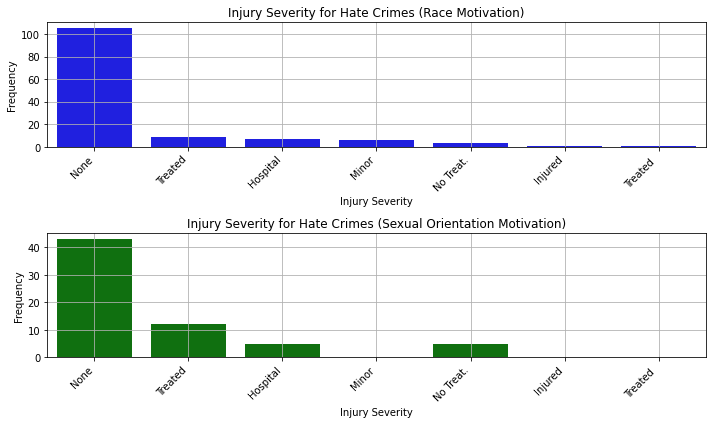

Chi-Square Test Results:
Chi-Square: nan
p-value: nan


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Assuming you have already loaded the data into the DataFrame 'df'
# (See previous code)

# Drop rows with missing values in any column
df.dropna(inplace=True)

# Separate the data for each motivation ('Race' and 'Sexual Orientation')
df_race = df[df['motivation'] == 'Race']
df_sexual_orientation = df[df['motivation'] == 'Sexual Orientation']

# Get the frequency of injury severity for 'Race' motivation
injury_counts_race = df_race['injury'].value_counts()

# Get the frequency of injury severity for 'Sexual Orientation' motivation
injury_counts_sexual_orientation = df_sexual_orientation['injury'].value_counts()

# Combine the injury counts into a single DataFrame for plotting
injury_counts_combined = pd.concat([injury_counts_race, injury_counts_sexual_orientation], axis=1)
injury_counts_combined.columns = ['Race', 'Sexual Orientation']

# Plot the graph - Create a bar plot
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
sns.barplot(x=injury_counts_combined.index, y=injury_counts_combined['Race'], color='blue')
plt.xlabel('Injury Severity')
plt.ylabel('Frequency')
plt.title('Injury Severity for Hate Crimes (Race Motivation)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.subplot(2, 1, 2)
sns.barplot(x=injury_counts_combined.index, y=injury_counts_combined['Sexual Orientation'], color='green')
plt.xlabel('Injury Severity')
plt.ylabel('Frequency')
plt.title('Injury Severity for Hate Crimes (Sexual Orientation Motivation)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.tight_layout()
plt.show()

# Perform statistical comparison using the chi-square test
chi2, p_value, _, _ = chi2_contingency(injury_counts_combined)
print("Chi-Square Test Results:")
print("Chi-Square:", chi2)
print("p-value:", p_value)


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Assuming you have already loaded the data into the DataFrame 'df'
# (See previous code)

# Drop rows with missing values in any column
df.dropna(inplace=True)

# Create a contingency table of weapons used vs. motivation
contingency_table = pd.crosstab(df['weapon'], df['motivation'])

# Perform the chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Display the results of the chi-square test
print("Chi-Square Test Results:")
print("Chi-Square:", chi2)
print("p-value:", p_value)


Chi-Square Test Results:
Chi-Square: 53.22167984792985
p-value: 0.3149999071985665


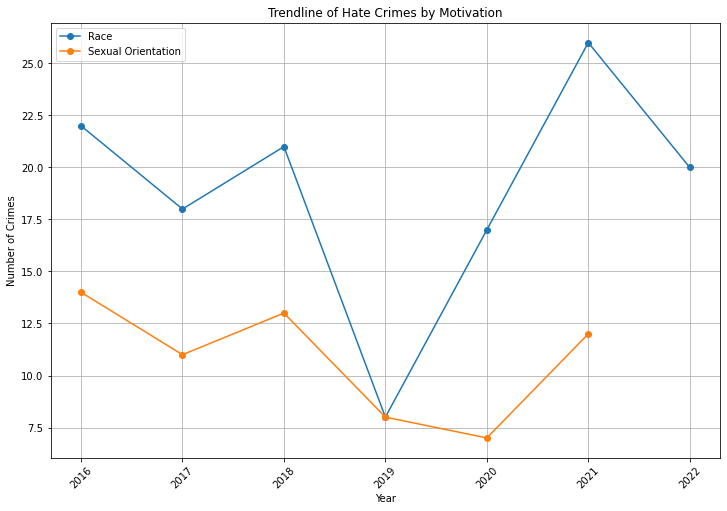

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the data into the DataFrame 'df'
# (See previous code)

# Drop rows with missing values in any column
df.dropna(inplace=True)

# Group data by year and each category under 'Motivation' and count the number of crimes in each group
crime_counts = df.groupby(['year', 'motivation'])['crime'].count().reset_index()

# Get the unique categories under 'Motivation'
motivation_categories = df['motivation'].unique()

# Create a trendline plot using matplotlib
plt.figure(figsize=(12, 8))

# Loop through each category under 'Motivation' and plot the trendline
for category in motivation_categories:
    df_category = crime_counts[crime_counts['motivation'] == category]
    plt.plot(df_category['year'], df_category['crime'], marker='o', label=category)

plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Trendline of Hate Crimes by Motivation')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


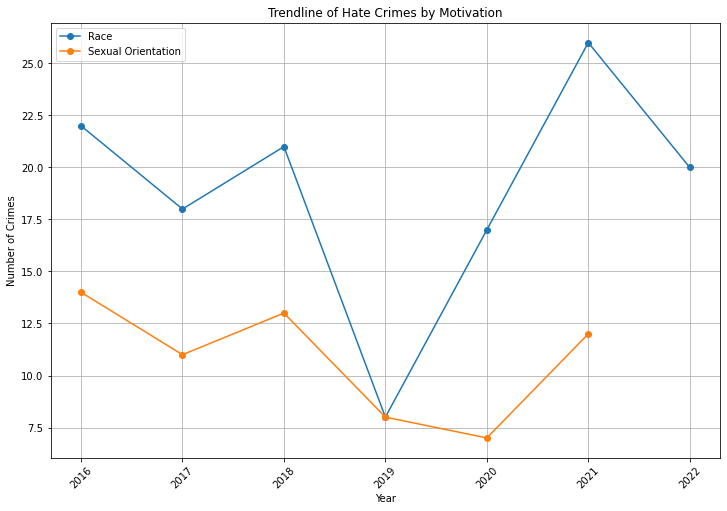

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the data into the DataFrame 'df'
# (See previous code)

# Drop rows with missing values in any column
df.dropna(inplace=True)

# Group data by year and each category under 'Motivation' and count the number of crimes in each group
crime_counts = df.groupby(['year', 'motivation'])['crime'].count().reset_index()

# Get the unique categories under 'Motivation'
motivation_categories = df['motivation'].unique()

# Create a trendline plot using matplotlib
plt.figure(figsize=(12, 8))

# Loop through each category under 'Motivation' and plot the trendline
for category in motivation_categories:
    df_category = crime_counts[crime_counts['motivation'] == category]
    plt.plot(df_category['year'], df_category['crime'], marker='o', label=category)

plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Trendline of Hate Crimes by Motivation')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [15]:
import pandas as pd

# Assuming you have already loaded the data into the DataFrame 'df'
# (See previous code)

# Drop rows with missing values in any column
df.dropna(inplace=True)

# Use get_dummies to create new columns for each factor under 'Motivation'
df_motivation_dummies = pd.get_dummies(df['motivation'], prefix='motivation')

# Concatenate the new dummy columns with the original DataFrame
df = pd.concat([df, df_motivation_dummies], axis=1)

# Display the updated DataFrame
print(df.head())


   year               crime motivation              weapon     injury  \
0  2016  Assault, No Weapon       Race  Hands, Fists, Feet   Hospital   
1  2016   Assault, w/Weapon       Race               Stick  No Treat.   
2  2016           Vandalism       Race              Marker       None   
3  2016  Threat, Phone Call       Race               Phone       None   
4  2016              Threat       Race               Knife       None   

   motivation_Race  motivation_Sexual Orientation  
0                1                              0  
1                1                              0  
2                1                              0  
3                1                              0  
4                1                              0  
